In [1]:
import json
import sys
import numpy as np
from numpy import log, exp, pi
import pandas as pd
import scipy
import scipy.stats as stats
import random
from scipy.stats import gaussian_kde, loguniform
from math import lgamma
from glob import glob
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = '/Users/chrislam/Desktop/sculpting/'
df = pd.read_csv(path+'hipergator/logLs.csv')
berger_kepler = pd.read_csv(path+'berger_kepler_stellar17.csv') 

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Figure 1

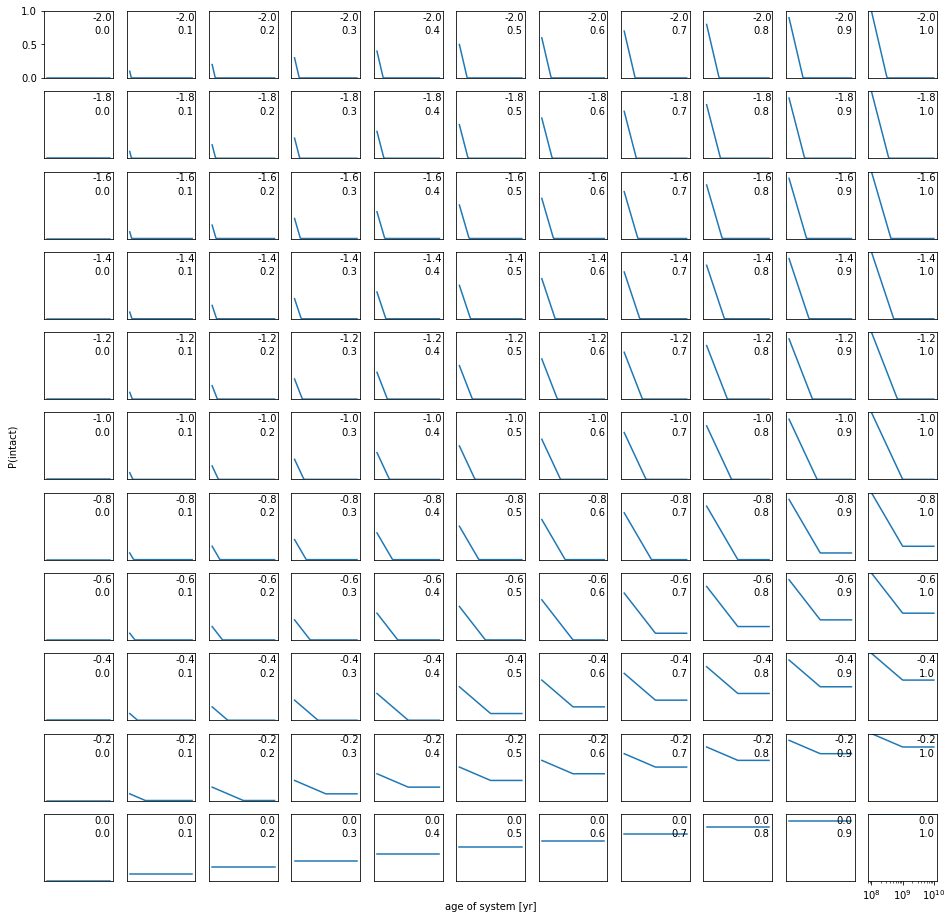

In [30]:
def plot_prob(x, m, b, cutoff):
    #return x*np.log10(m) + b
    #return -np.log10(x*m) + b
    #return -np.log10(x*m) + b # y=mx+b
    #return -np.log10(m * (x-1e8)) + b # linear equation given slope and one point, but with slope and x axis logged
    y = []
    for x_elt in x:
        if x_elt <= 1e8:
            y.append(b)
        elif (x_elt > 1e8) & (x_elt <= cutoff):
            y_elt = b + m*(np.log10(x_elt)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt)
        elif x_elt > cutoff: # if star is older than cutoff, use P(intact) at cutoff time
            y_elt = b + m*(np.log10(cutoff)-8)
            if y_elt < 0: # handle negative probabilities
                y_elt = 0
            elif y_elt > 1:
                y_elt = 1
            y.append(y_elt) 
            
    return y

x = np.logspace(8, 10, 100)
fig, axes = plt.subplots(figsize=(16,16))
index = 0
ms = np.linspace(-2, 0, 11)
bs = np.linspace(0, 1, 11)
for i, gi_m in enumerate(ms):
    for j, gi_b in enumerate(bs):
        ax = plt.subplot2grid((11,11), (i,j))
        ax.text(0.85, 0.9, round(gi_m, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.text(0.85, 0.7, round(gi_b, 1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        
        #cube = [random.uniform(0,1), random.uniform(0,1)]
        #cube = prior_grid(cube, ndim, nparams, gi_m, gi_b)
        cutoff = 1e9 # placeholder
        #print(round(gi_m, 1), df.bs[index])
        y = plot_prob(x, round(gi_m, 1), round(gi_b, 1), cutoff)
        #y = compute_prob(x, round(gi_m, 1), df.bs[index], cutoff)
        #y = prob_intact(x, round(df.ms[index], 1), df.bs[index], cutoff)
        #y = prob_intact(x, np.linspace(-1,0,11)[gi_m], np.linspace(0,1,11)[gi_b])
        ax.plot(x, y)
        ax.set_ylim([0, 1])
        
        if index < 1:
            ax.get_yaxis().set_visible(True)
        else:
            ax.get_yaxis().set_visible(False)
        
        if index < 120:
            ax.get_xaxis().set_visible(False)
        else:
            ax.get_xaxis().set_visible(True)            

        ax.set_xscale('log')
        
        index += 1
        
        # plot vertical red line through median age of Berger FGK dwarfs
        #ax.plot([1e9*np.median(berger_kepler.iso_age), 1e9*np.median(berger_kepler.iso_age)], 
        #        [0,1], color='r', alpha=0.3, linestyle='--')

# add axis labels in the middle of the subplot
fig.add_subplot(111, frameon=False)
# this hack introduces tick marks, so hide them
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('age of system [yr]')
plt.ylabel('P(intact)')
plt.savefig(path+'paper/models.eps', format='eps')
plt.show()